<a href="https://colab.research.google.com/github/rhozon/meu_projeto_versionado/blob/master/Exercicio_Visualiza%C3%A7%C3%A3o_da_Informa%C3%A7%C3%A3o_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


***

**Nome**: Rodrigo Hermont Ozon

**RGM**: 23931795

**Instituição**: Cruzeiro do Sul Virtual

**Curso**: Tecn. Ciência de Dados

***


# Disciplina: Visualização de Dados (em Python)

***

## Dataset Série Temporal

**Taxa de desemprego norte-americana** $⇒$ [Fonte: datahub.io](https://datahub.io/core/employment-us)

_Descrição:_ 

O dataset contém a taxa de desemprego de diferentes indústrias nos EUA durante os anos de 1940-2010 (aqui cortamos ela a partir de 2000). Ademais, o conjunto de dados contém séries temporais para 16 setores e em 122 pontos de tempo (um por mês durante 10 anos). Em geral, o _workflow_ típico de um projeto de _Data Science_ envolverá limpeza e exploração de dados, portanto, começaremos lendo os dados e verificando os valores ausentes.

Iniciamos chamando as bibliotecas do Python necessárias:


In [132]:
# Bibliotecas

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# SeaBorn
import seaborn as sns

# StatsModels
import statsmodels.api as sm



# Carrega o dataset

In [133]:
# Carrega o dataset

url = "https://raw.githubusercontent.com/rhozon/datasets/master/ch5_employment.csv" # Cortei o dataset e subi no meu repo público do github

jobs = pd.read_csv(url)

jobs.head() # Preview do dataset


,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


# Inspeção dos dados (data quality)

In [134]:
# Verifica o tipo de cada coluna no dataframe
print(jobs.dtypes)

datestamp                          object
Agriculture                       float64
Business services                 float64
Construction                      float64
Durable goods manufacturing       float64
Education and Health              float64
Finance                           float64
Government                        float64
Information                       float64
Leisure and hospitality           float64
Manufacturing                     float64
Mining and Extraction             float64
Nondurable goods manufacturing    float64
Other                             float64
Self-employed                     float64
Transportation and Utilities      float64
Wholesale and Retail Trade        float64
dtype: object


Precisamos converter a coluna de data para o formato adequado para que o Python interprete esse dataframe como dados de séries temporais:

In [135]:
# Converte a coluna do tipo datestamp para um objeto datetime
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Seta as colunas datestamp como índice no dataframe
jobs = jobs.set_index('datestamp')


Em seguida checaremos se existem dados faltantes em cada série temporal

In [136]:
# Checa o numero de dados faltantes em cada coluna 
print(jobs.isnull().sum())

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64


# Indentificação dos _outliers_ com boxplots

Ao explorar a distribuição das variáveis ​​e, como estamos trabalhando com séries temporais, exploraremos suas propriedades usando _boxplots_ e resumos estatísticos. Lembrando que, pode-se plotar dados em um dataframe como _boxplots_ com o comando:

```
df.boxplot(fontsize=6, vert=False)
```

Com o parâmetro ``vert``, podemos especificar se os _boxplots_ devem ser plotados horizontalmente ou verticalmente.

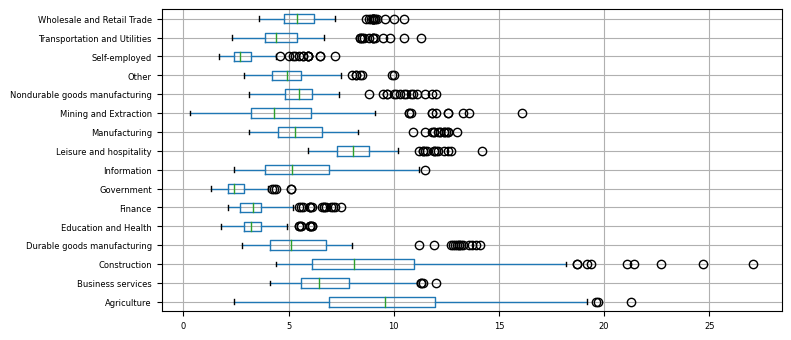

In [137]:
# Gera o bloxplot
fig = plt.figure(figsize=(8,4), dpi=100)

jobs.boxplot(fontsize=6, vert=False)
plt.show()


Veremos um resumo estatístico com as principais descritivas.

In [138]:
print(jobs.describe()) # Estatísticas descritivas de cada série


       Agriculture  Business services  Construction  \
count   122.000000         122.000000    122.000000   
mean      9.840984           6.919672      9.426230   
std       3.962067           1.862534      4.587619   
min       2.400000           4.100000      4.400000   
25%       6.900000           5.600000      6.100000   
50%       9.600000           6.450000      8.100000   
75%      11.950000           7.875000     10.975000   
max      21.300000          12.000000     27.100000   

       Durable goods manufacturing  Education and Health     Finance  \
count                   122.000000            122.000000  122.000000   
mean                      6.025410              3.420492    3.540164   
std                       2.854475              0.877538    1.235405   
min                       2.800000              1.800000    2.100000   
25%                       4.125000              2.900000    2.700000   
50%                       5.100000              3.200000    3.300000   


A partir dos _boxplots_ e do resumo das estatísticas descritivas mostramos os principais setores da economia americana com maior fluxo médio de trabalhadores e outra com a maior variabilidade (_turn-over_):

In [139]:
# Printa o nome da série temporal com a média mais elevada
print('Agriculture')

# Imprime o nome da série temporal com maior variabilidade
print('Construction')

Agriculture
Construction


O nosso conjunto de dados contém 16 séries temporais representando a taxa de desemprego de vários setores entre 2001 e 2010. Isso pode parecer uma grande quantidade de séries temporais para visualizar ao mesmo tempo, mas podemos utilizar gráficos facetados. Agora exploraremos algumas das séries temporais no nosso dataframe e procuraremos extrair algumas informações significativas desses gráficos.

            Finance  Information  Manufacturing  Construction
datestamp                                                    
2000-01-01      2.7          3.4            3.6           9.7
2000-02-01      2.8          2.9            3.4          10.6
2000-03-01      2.6          3.6            3.6           8.7
2000-04-01      2.3          2.4            3.7           5.8
2000-05-01      2.2          3.5            3.4           5.0


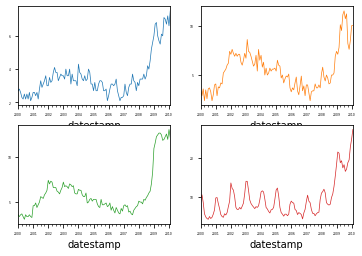

In [140]:
# Geramos um subset das séries temporais
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Visualiza as primeiras 5 linhas
print(jobs_subset.head(5))

# Cria um gráfico facetado com 2 linhas e 2 colunas
ax = jobs_subset.plot(subplots=True,
                      layout=(2, 2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=False)

plt.show()

Ao plotar as séries temporais ``Finance, Information, Manufacturing`` do nosso dataframe, observamos um aumento distinto nas taxas de desemprego durante 2001 e 2008. Em geral, os gráficos de séries temporais podem se tornar ainda mais informativos se incluirmos anotações adicionais que enfatizem observações ou eventos específicos. Isso permite que destaquemos rapidamente partes do gráfico para os leitores e pode ajudar a inferir o que pode ter causado um evento específico.


<Figure size 3200x3200 with 0 Axes>

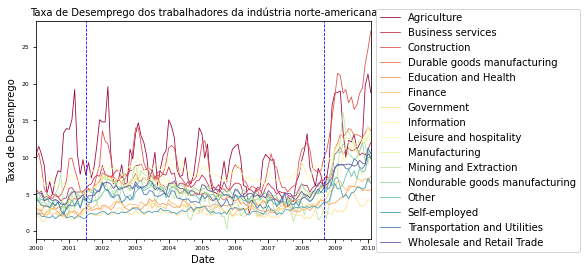

In [141]:
fig = plt.figure(figsize=(16,16), dpi=200)

# Plota todas as séries no dataframe ``jobs`` 
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8)

# Seta os labels e a legenda
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Taxa de Desemprego', fontsize=10)
ax.set_title('Taxa de Desemprego dos trabalhadores da indústria norte-americana', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Demarca os plots com linhas verticais
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Mostra o plot
plt.show()

# Traçando tendências anuais e mensais nos dados

No Python quando o índice de um dataframe é do tipo ``datetime``, é possível extrair diretamente o dia, mês ou ano de cada data no índice. Adicionalmente, podemos extrair o ano de cada data no índice usando o atributo ``.index.year``. Podemos então usar os métodos ``.groupby()`` e ``.mean()`` para calcular o valor médio anual de cada série temporal em seu dataframe.

Aplicaremos essas formulações para exibir os valores médios agregados de cada série temporal em nosso dataframe.

<Figure size 3200x3200 with 0 Axes>

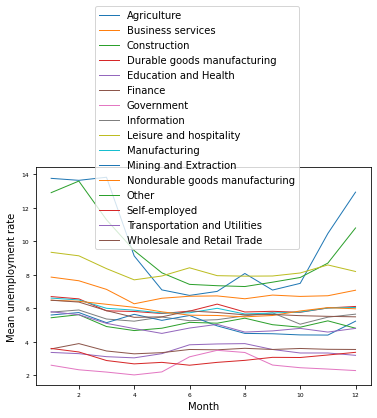

In [142]:
fig = plt.figure(figsize=(16,16), dpi=200)

# Extrai o índice de mês do dataframe
index_month = jobs.index.month

# Computa a média da taxa de desemprego em cada mês
jobs_by_month = jobs.groupby(index_month).mean()

# Plota a taxa de desemprego média de cada mês
ax = jobs_by_month.plot(fontsize=6, linewidth=1)

# Seta os labels dos eixos e legenda
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show()

# Decomposição sazonal das séries temporais do desemprego em cada segmento da economia

Agora, iremos inicializar um dicionário vazio com um conjunto de chaves, ``{}`` usando um ``for loop`` para iterar pelas colunas do dataframe e aplicar a decomposição da série temporal a cada uma delas. Após cada decomposição de série temporal, colocaremos os resultados no dicionário usando o comando ``my_dict[key] = value``, onde ``my_dict`` é o dicionário, ``key`` é o nome da coluna/série temporal e ``value`` é o objeto de decomposição dessa série temporal.



In [143]:
# Inicializa o dicionário
jobs_decomp = {}

# Pega os nomes de cada série no dataframe
jobs_names = jobs.columns

# Roda a decomposição das series no dataframe
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

Agora plotamos a decomposição sazonal das séries.

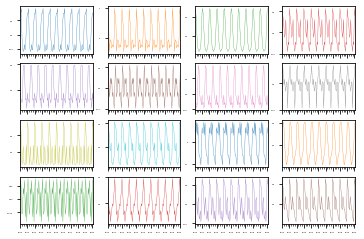

<Figure size 2800x2800 with 0 Axes>

In [144]:
# Inicializa um dicionário
jobs_seasonal = {}

# Extrai os valores sazonais pela decomposição de cada séries temporais
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Crio o dataframe do dicionário jobs_seasonal 
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove o label do índice 
seasonality_df.index.name = None

# Cria um plot facetado do dataframe seasonality_df
seasonality_df.plot(subplots=True,
                   layout=(4, 4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False)

fig = plt.figure(figsize=(14,14), dpi=200)

# Mostra o plot
plt.show()


# Fluxo pendular do mercado de trabalho nos EUA

Acima extraimos o componente sazonal de cada série no nosso dataframe ``jobs`` e armazenamos esses resultados em um novo dataframe
 chamado ``seasonality_df``. No contexto dos dados de empregos, pode ser interessante comparar o comportamento da sazonalidade, pois isso pode ajudar a descobrir quais setores de empregos são os mais semelhantes ou os mais diferentes.

Isso pode ser feito usando o ``seasonality_dfDataFrame`` e computando a correlação entre cada série temporal no conjunto de dados. Iremos calcular e criar uma visualização de mapa de cluster das correlações entre séries temporais no ``seasonality_dfDataFrame``.

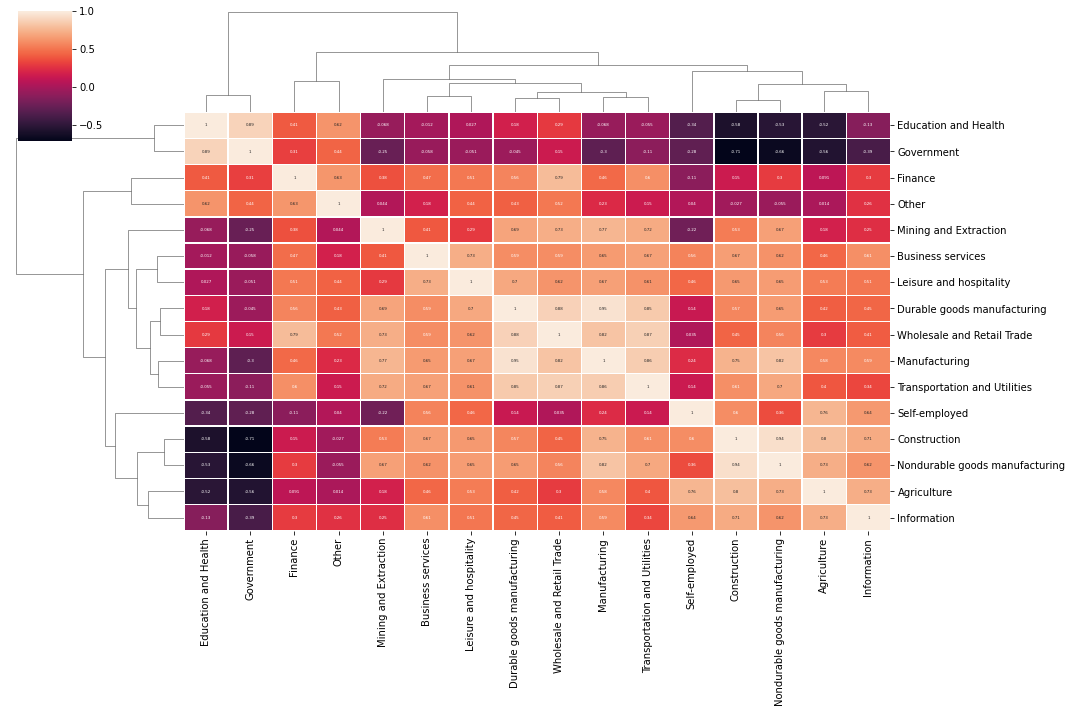

0.89


In [145]:
# Captura a matriz de correlação de seasonality_df
seasonality_corr = seasonality_df.corr(method='spearman')

# Customiza o clustermap de seasonality_corr 
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

# Printa a correlação entre as sazonalidades de Government and Education & Health industries
print(0.89)

Como vimos as séries temporais no dataframe ``jobs`` contêm várias séries temporais com sazonalidades muito diferentes. Usando o mapa de agrupamento dos gráficos de correlação que geramos, podemos identificar e discutir qual série temporal é a mais correlacionada aos trabalhadores ``Self-Employed``, verificando que a série ``Agriculture`` é a série com maior grau de associação.

***

# Sobre o autor

***


**Rodrigo Hermont Ozon**, economista (UFPR, 2008) e matemático (UNESPAR, 2003) é mestre em Desenvolvimento Econômico (UFPR, 2011) especializado em econometria e pesquisador na área de séries temporais desde 2008.

Seu portfólio de projetos de dados (em linguagem R) pode ser acessado em [rhozon.github.io](https://rhozon.github.io/selecaodeprodutosnor/index.html) com diversos _posts_ e publicações interessantes a respeito do uso de modelos de análise de dados, relatórios analíticos e discussões sobre métodos econométricos relevantes.

A versão mais atualizada de seu currículo e suas interações podem ser vistas na sua página do [LinkeDin](https://www.linkedin.com/in/rodrigohermontozon/)

***


